---


In [32]:
from datetime import datetime
import socket

print(
    f"ip address: {socket.gethostbyname(socket.gethostname())} ({socket.gethostname()})"
)
print(f"last run: {datetime.now()}")


ip address: 192.168.1.104 (DESKTOP-26K7T5M)
last run: 2022-04-27 09:30:50.721011


In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv('camera rating.csv')
df.head()

,model,mpix,sensor,price,launch,overall,portrait,landscrape,sports
0,Hasselblad X1D-50c,50.0,Medium Format,$8995,Jun. 2016,102.0,26.2,14.8,4489.0
1,Pentax 645Z,51.4,Medium Format,$8499,Apr. 2014,101.0,26.0,14.7,4505.0
2,Panasonic Lumix DC-S1R,47.3,Full Frame,$3700,Feb. 2019,100.0,26.4,14.1,3525.0
3,Nikon D850,45.7,Full Frame,$3300,Aug. 2017,100.0,26.4,14.8,2660.0
4,Sony A7R III,42.4,Full Frame,$3200,Oct. 2017,100.0,26.0,14.7,3523.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       301 non-null    object 
 1   mpix        301 non-null    float64
 2   sensor      301 non-null    object 
 3   price       301 non-null    object 
 4   launch      301 non-null    object 
 5   overall     301 non-null    float64
 6   portrait    301 non-null    float64
 7   landscrape  301 non-null    float64
 8   sports      301 non-null    float64
dtypes: float64(5), object(4)
memory usage: 21.3+ KB


In [36]:
df['price']=df['price'].str.extract(r'(\d+)')
df['price']=df['price'].astype(float)


In [37]:
df

,model,mpix,sensor,price,launch,overall,portrait,landscrape,sports
0,Hasselblad X1D-50c,50.0,Medium Format,8995.0,Jun. 2016,102.0,26.2,14.8,4489.0
1,Pentax 645Z,51.4,Medium Format,8499.0,Apr. 2014,101.0,26.0,14.7,4505.0
2,Panasonic Lumix DC-S1R,47.3,Full Frame,3700.0,Feb. 2019,100.0,26.4,14.1,3525.0
3,Nikon D850,45.7,Full Frame,3300.0,Aug. 2017,100.0,26.4,14.8,2660.0
4,Sony A7R III,42.4,Full Frame,3200.0,Oct. 2017,100.0,26.0,14.7,3523.0
...,...,...,...,...,...,...,...,...,...
296,Nikon D70s,6.1,APS-C,700.0,Apr. 2005,50.0,20.4,10.3,529.0
297,Nikon D70,6.0,APS-C,400.0,Jan. 2004,50.0,20.4,10.3,529.0
298,Panasonic Lumix DMC GF5,12.1,"4/3""",599.0,Apr. 2012,50.0,20.5,10.0,573.0
299,Panasonic Lumix DMC GF3,12.1,"4/3""",699.0,Jun. 2011,50.0,20.6,10.1,459.0


In [136]:
df['sensor'].values

array(['Medium Format', 'Medium Format', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Medium Format', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'APS-C', 'Full Frame', 'Full Frame', 'Medium Format',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame', 'APS-C',
       'APS-C', 'Full Frame', 'Medium Format', 'APS-C', 'Full Frame',
       'Full Frame', 'Full Frame', 'APS-C', 'APS-C', 'Full Frame',
       'Full F

Linear regression

In [104]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [39]:
df.columns

Index(['model', 'mpix', 'sensor', 'price', 'launch', 'overall', 'portrait',
       'landscrape', 'sports'],
      dtype='object')

In [117]:
X = df[['mpix', 'price', 'portrait','landscrape', 'sports']]
y = df['overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7)

In [70]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

210
91
210
91


In [96]:
len(df)

301

In [81]:
import seaborn as sns

pairplot แสดงความสัมพันธ์แต่ละตัวแปรว่ามีทิศทางสัมพันธ์กันหรือไม่

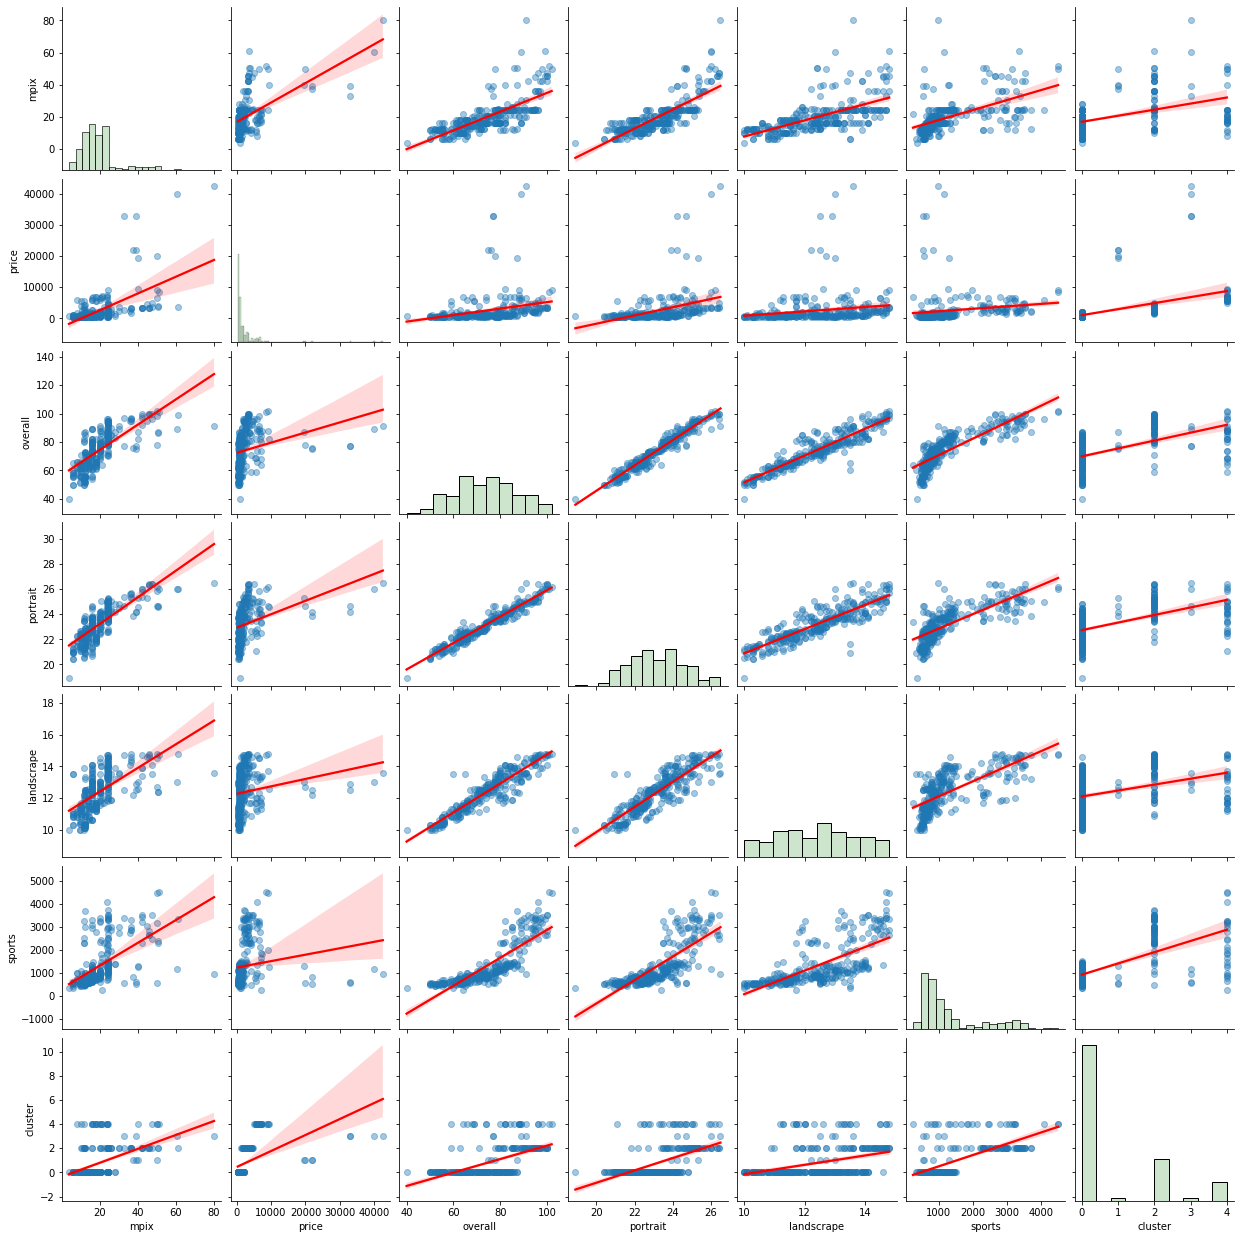

In [205]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'red'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [129]:
model = LinearRegression()
model

LinearRegression()

In [130]:
model.fit(X_train, y_train)

LinearRegression()

ความแม่นยำของการวิเคราะห์ model นี้ อยู่ที่ 98.85 %

In [131]:
model.score(X_train, y_train)


0.9885136611323049

In [132]:
model.intercept_

-91.51181562177209

In [133]:
model.coef_

array([-4.16684066e-02, -3.85239776e-05,  5.44993278e+00,  2.95396677e+00,
        2.74136361e-03])

In [134]:
y_Pre = model.predict(X_train)
y_Pre

array([ 90.00487744,  65.58569444,  98.11993152,  63.78321791,
        62.65674018,  66.70103796,  72.11393104,  72.69413841,
        79.25549207,  71.11997475,  88.25581988,  68.95817885,
        80.60865545,  61.8706097 ,  76.87591527,  53.94049173,
        78.43250959,  55.31248339,  98.12571309, 100.22806166,
        58.03824071,  75.40118574,  64.26299038,  62.21244104,
        51.31903388,  80.88910421,  68.77419882,  80.09965711,
        98.80694007,  94.42208803,  94.76005594,  77.53719762,
        87.27784122,  58.75003624,  85.0405695 ,  71.94922354,
        56.90624762,  56.28241095,  67.19438527,  93.34942786,
       103.49041978,  63.81346027,  96.91016232,  98.7704772 ,
        57.03927638,  79.51812113,  90.76315196,  78.37084877,
        53.65533517,  70.76177505,  73.59459941,  65.88441538,
        55.54124974,  88.05574996,  66.36718885,  91.93891105,
        81.87256252,  66.63973619,  76.32957878,  73.05212342,
        83.29577115,  82.76792914,  67.0130086 ,  64.31

การ predicted ว่าราคากล้อง กับรายละเอียดของภาพ โดยรวมแล้วค่าใกล้เคียงกับ overall ไหม

In [124]:
train = pd.concat([X_train, y_train], axis='columns')
dc = pd.concat([train.reset_index(), pd.Series(y_Pre, name='Predicted')], axis='columns')
dc.head()

,index,mpix,price,portrait,landscrape,sports,overall,Predicted
0,40,24.3,1600.0,24.9,13.6,2449.0,90.0,61.794783
1,237,14.6,610.0,22.8,10.8,572.0,63.0,86.611709
2,11,33.0,2800.0,25.4,14.7,3379.0,97.0,62.195639
3,230,10.1,899.0,22.1,11.3,703.0,64.0,83.337248
4,236,18.0,400.0,21.9,11.4,695.0,63.0,78.612945


In [125]:
model = smf.ols(formula="overall ~ mpix + price + portrait + landscrape + sports",data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3511.
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          1.07e-195
Time:                        10:05:47   Log-Likelihood:                -370.25
No. Observations:                 210   AIC:                             752.5
Df Residuals:                     204   BIC:                             772.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -91.5118      3.363    -27.214      0.000     -98.142     -84.882
mpix          -0.0417      0.017     -2.434      0.016      -0.075      -0.008
price      -3.852e-05   2.34e-05     -1.649      0.101   -8.46e-05    7.54e-06
portrait       5.4499      0.208     26.217      0.000       5.040       5.860
landscrape     2.9540      0.172     17.184      0.000       2.615       3.293
sports         0.0027      0.000     16.992      0.000       0.002       0.003
==============================================================================
Omnibus:                        8.072   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.986
Skew:                          -0.415   Prob(JB):                       0.0184
Kurtosis:                       3.475   Cond. No.                     2.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kmeans_Clustering

<AxesSubplot:xlabel='portrait', ylabel='landscrape'>

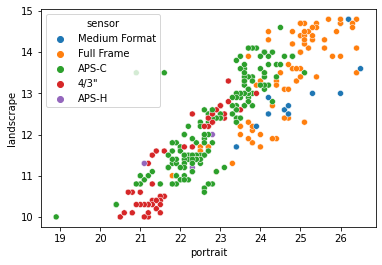

In [139]:
sns.scatterplot(data=df, x='portrait', y='landscrape', hue='sensor')

<AxesSubplot:xlabel='portrait', ylabel='mpix'>

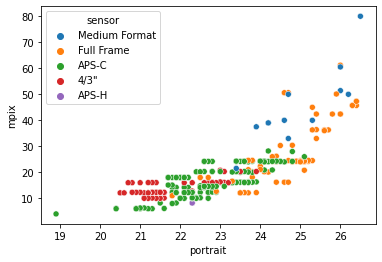

In [265]:
sns.scatterplot(data=df, x='portrait', y='mpix', hue='sensor')

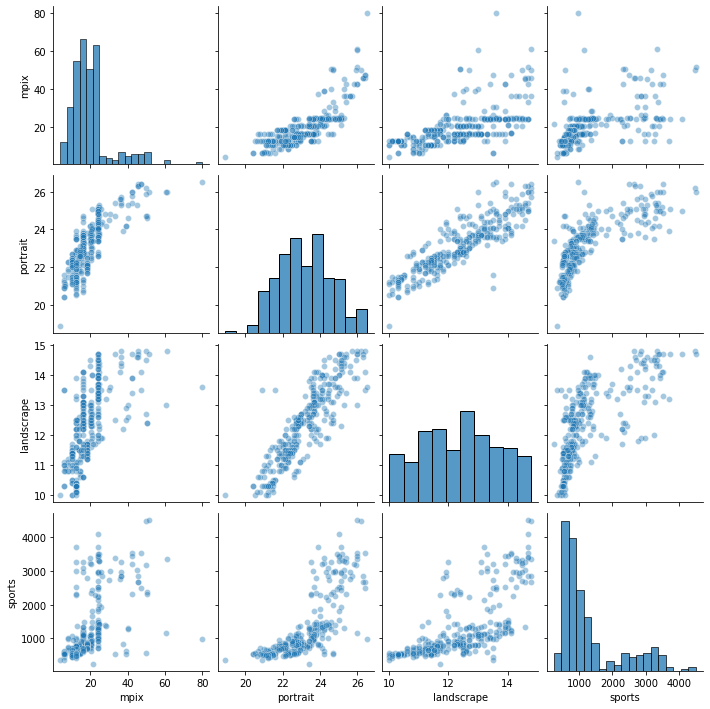

In [158]:
sns.pairplot(df, vars=cols, 
             plot_kws={'alpha': .4});

In [140]:
df.columns

Index(['model', 'mpix', 'sensor', 'price', 'launch', 'overall', 'portrait',
       'landscrape', 'sports'],
      dtype='object')

In [153]:
cols = ['mpix', 'portrait',
       'landscrape', 'sports']

In [154]:
from sklearn.cluster import KMeans

In [249]:
model = KMeans(n_clusters=5)
model

KMeans(n_clusters=5)

In [250]:
model.fit(X)

KMeans(n_clusters=5)

In [251]:
model.cluster_centers_.round(3)

array([[1.599700e+01, 8.878140e+02, 2.259700e+01, 1.200500e+01,
        8.281330e+02, 0.000000e+00],
       [4.162500e+01, 2.086250e+04, 2.452500e+01, 1.260000e+01,
        8.092500e+02, 1.000000e+00],
       [2.426500e+01, 6.728385e+03, 2.410000e+01, 1.282300e+01,
        2.216923e+03, 4.000000e+00],
       [5.312500e+01, 3.709375e+04, 2.535000e+01, 1.300000e+01,
        8.210000e+02, 3.000000e+00],
       [2.824600e+01, 2.947772e+03, 2.477400e+01, 1.357900e+01,
        2.686965e+03, 2.000000e+00]])

In [252]:
model.labels_

array([2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       3, 4, 2, 4, 2, 2, 2, 2, 4, 0, 0, 4, 1, 4, 2, 4, 4, 0, 0, 4, 4, 0,
       4, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 4, 0,
       0, 0, 4, 0, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [253]:
df['sensor'].values

array(['Medium Format', 'Medium Format', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Medium Format', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'APS-C', 'Full Frame', 'Full Frame', 'Medium Format',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame',
       'Full Frame', 'Full Frame', 'Full Frame', 'Full Frame', 'APS-C',
       'APS-C', 'Full Frame', 'Medium Format', 'APS-C', 'Full Frame',
       'Full Frame', 'Full Frame', 'APS-C', 'APS-C', 'Full Frame',
       'Full F

In [254]:
model.transform(X)

array([[ 8895.48188381, 12424.9025388 ,  3209.44690481, 28337.14859139,
         6310.05376606],
       [ 8452.85659809, 12904.06181978,  2893.28848654, 28831.08722977,
         5841.39773623],
       [ 3896.47032967, 17376.03934399,  3298.89680491, 33503.04750774,
         1126.28408068],
       ...,
       [  385.39630799, 20264.89925953,  6346.02424928, 36495.61625916,
         3160.04319766],
       [  414.64811188, 20166.56395358,  6280.4423448 , 36396.57394022,
         3165.61164305],
       [  476.45887768, 19967.77250606,  6119.51525885, 36196.8226911 ,
         3105.81232845]])

In [255]:
df['cluster']=model.labels_
df

,model,mpix,sensor,price,launch,overall,portrait,landscrape,sports,cluster
0,Hasselblad X1D-50c,50.0,Medium Format,8995.0,Jun. 2016,102.0,26.2,14.8,4489.0,2
1,Pentax 645Z,51.4,Medium Format,8499.0,Apr. 2014,101.0,26.0,14.7,4505.0,2
2,Panasonic Lumix DC-S1R,47.3,Full Frame,3700.0,Feb. 2019,100.0,26.4,14.1,3525.0,4
3,Nikon D850,45.7,Full Frame,3300.0,Aug. 2017,100.0,26.4,14.8,2660.0,4
4,Sony A7R III,42.4,Full Frame,3200.0,Oct. 2017,100.0,26.0,14.7,3523.0,4
...,...,...,...,...,...,...,...,...,...,...
296,Nikon D70s,6.1,APS-C,700.0,Apr. 2005,50.0,20.4,10.3,529.0,0
297,Nikon D70,6.0,APS-C,400.0,Jan. 2004,50.0,20.4,10.3,529.0,0
298,Panasonic Lumix DMC GF5,12.1,"4/3""",599.0,Apr. 2012,50.0,20.5,10.0,573.0,0
299,Panasonic Lumix DMC GF3,12.1,"4/3""",699.0,Jun. 2011,50.0,20.6,10.1,459.0,0


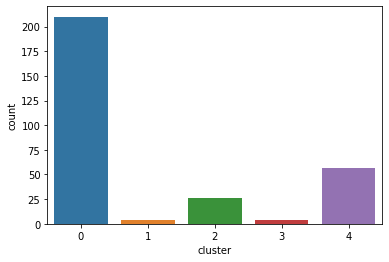

In [256]:
sns.countplot(x='cluster', data=df);

In [257]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

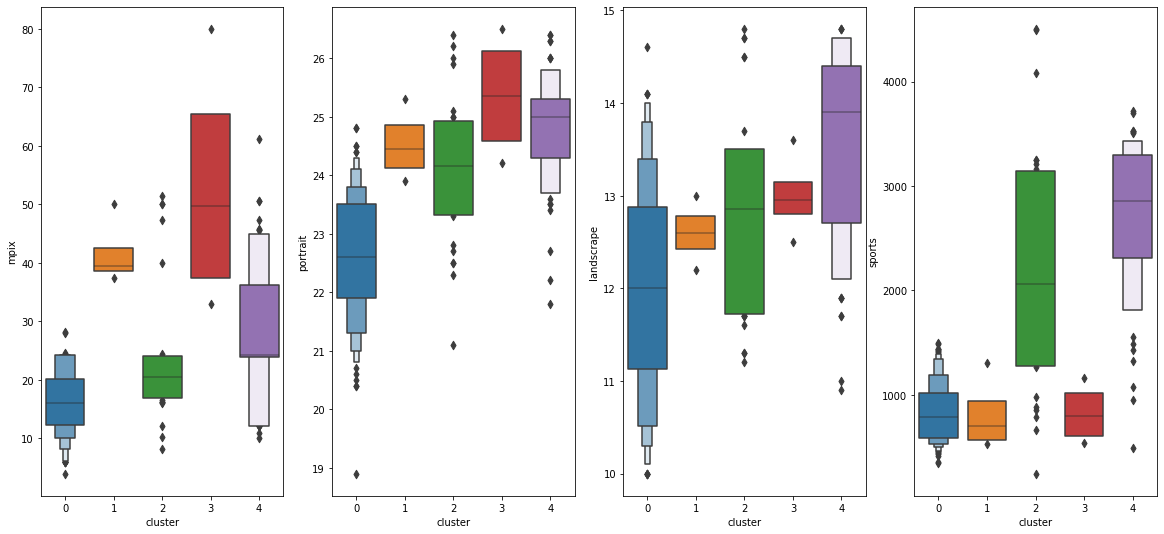

In [258]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.boxenplot(x='cluster', y=col, data=df, ax=ax[i])

In [259]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) 
mat = pt.fit_transform(df[cols])
mat[:4].round(2)

array([[2.13, 2.04, 1.85, 1.9 ],
       [2.18, 1.91, 1.78, 1.9 ],
       [2.02, 2.16, 1.33, 1.69],
       [1.96, 2.16, 1.85, 1.41]])

In [260]:
XZ=pd.DataFrame(mat, columns=cols) 
XZ.head()

,mpix,portrait,landscrape,sports
0,2.129954,2.037145,1.852822,1.901182
1,2.182444,1.910668,1.778610,1.904116
2,2.023839,2.162654,1.329698,1.689261
3,1.957660,2.162654,1.852822,1.408319
4,1.812463,1.910668,1.778610,1.688733


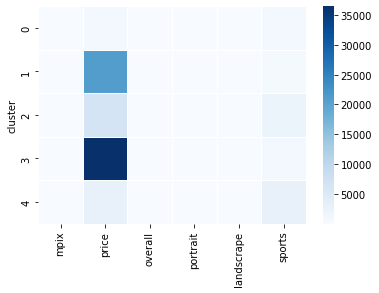

In [264]:
sns.heatmap(df.groupby('cluster').median(), cmap='Blues', linewidths=1);

In [262]:
dx=XZ
dx['cluster']=model.labels_
dx.head()


,mpix,portrait,landscrape,sports,cluster
0,2.129954,2.037145,1.852822,1.901182,2
1,2.182444,1.910668,1.778610,1.904116,2
2,2.023839,2.162654,1.329698,1.689261,4
3,1.957660,2.162654,1.852822,1.408319,4
4,1.812463,1.910668,1.778610,1.688733,4


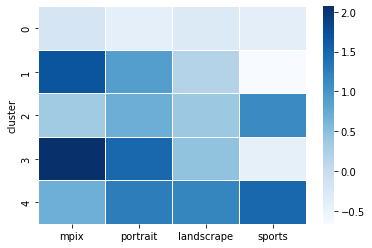

In [263]:
sns.heatmap(dx.groupby('cluster').median(), cmap='Blues', linewidths=1);

แบ่งกลุ่ม sensor กล้องเป็น5clusters  
โดยจะเห็นได้ว่ากล้อง cluster 0 จะมี pixel หรือความระเอียดภาพต่ำ  รวมถึงค่าในการถ่ายภาพ portrait, landscrape, sports ก็มีค่าต่ำอีกด้วย ซึ่ง cluster 0 จะเป็นพวก sensor 4/3 กับ APS-C บางรุ่น
ส่วน sensor full frame หรือ cluster4 ก็จะเห็นได้ว่ามีค่ารายละเอียดการถ่ายภาพได้ค่อนข้างดีกว่า 4/3 กับ APS-C 